## SUGARCANE PRODUCTION PROJECT

In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [51]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv ")

In [52]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [53]:
df.shape

(103, 7)

## Data Cleaning

In [54]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [55]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [56]:
df.rename(columns={"Production(Tons)" : "Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)" : "Production per Person (Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)" : "Acreage (Hectare)"},inplace=True)
df.rename(columns={"Yeild (Kg / Hectare)" : "Yeild (Kg / Hectare)"},inplace=True)



In [57]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [58]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [59]:
df = df.dropna().reset_index()

In [60]:
df.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)


In [61]:
df.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [62]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [63]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [64]:
df.shape[0]

102

In [65]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [66]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

## Univariate Analysis

In [67]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

In [68]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

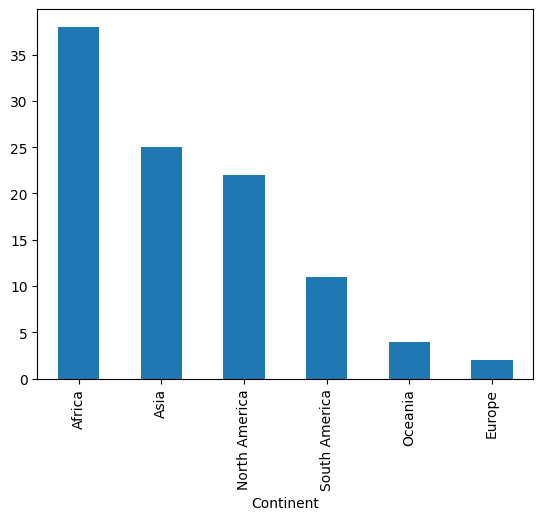

In [69]:
df["Continent"].value_counts().plot(kind="bar")

In [70]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## CHECK OUTLIERS

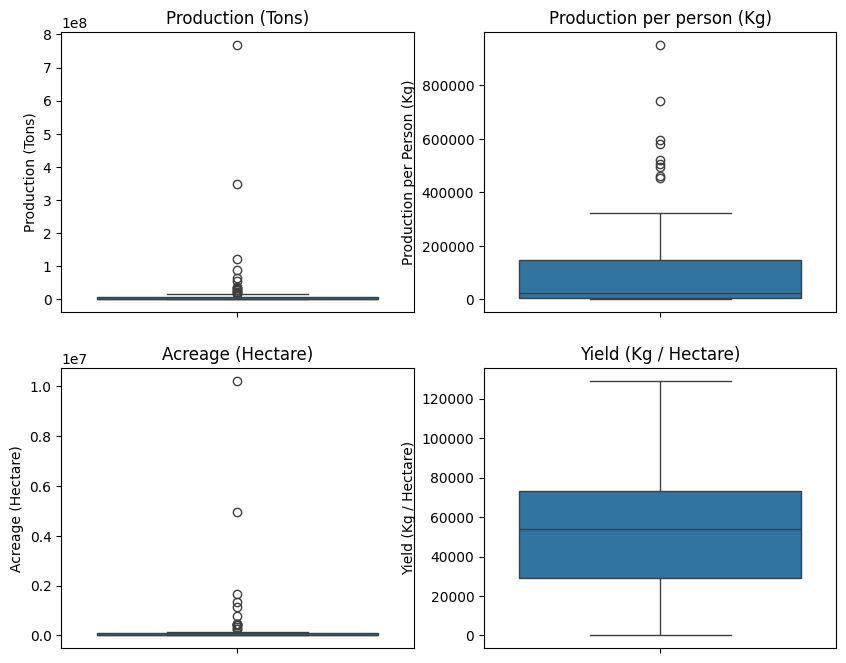

In [71]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.title("Production (Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.title("Production per person (Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.show()

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of the columns

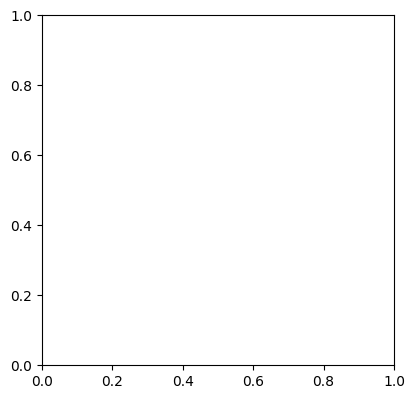

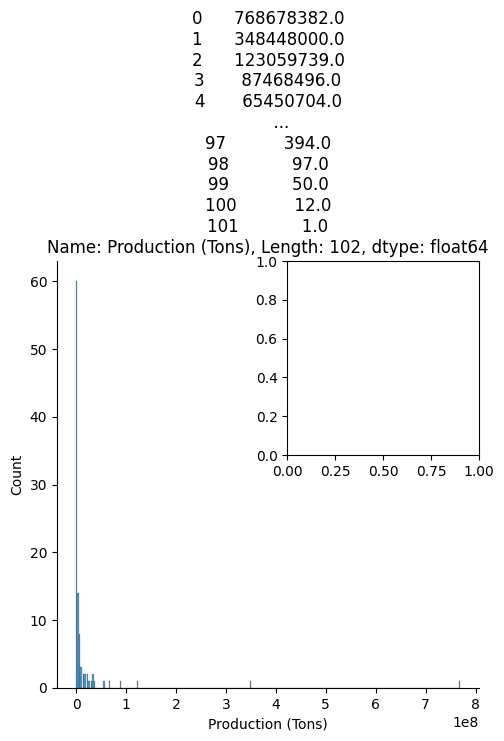

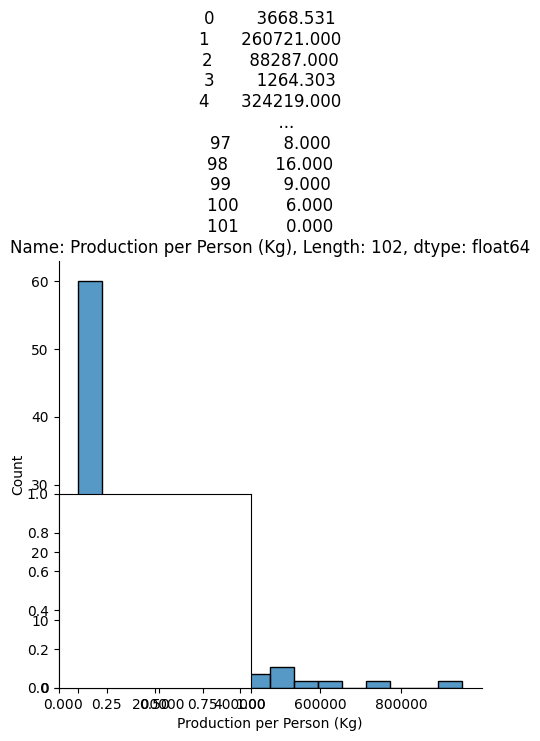

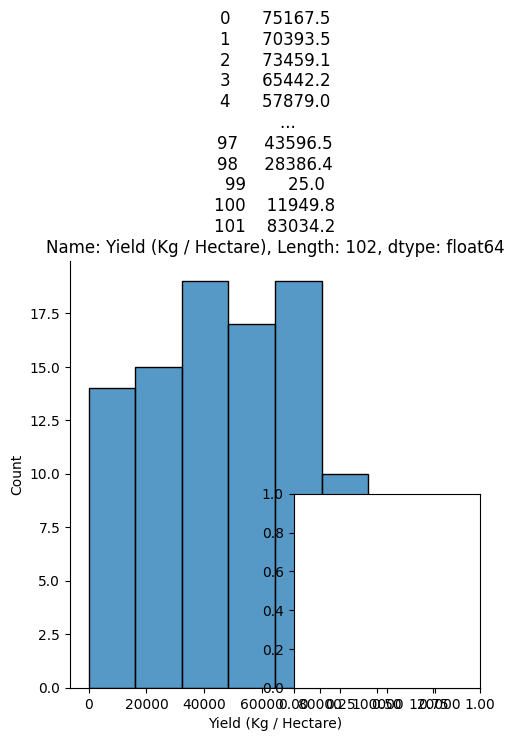

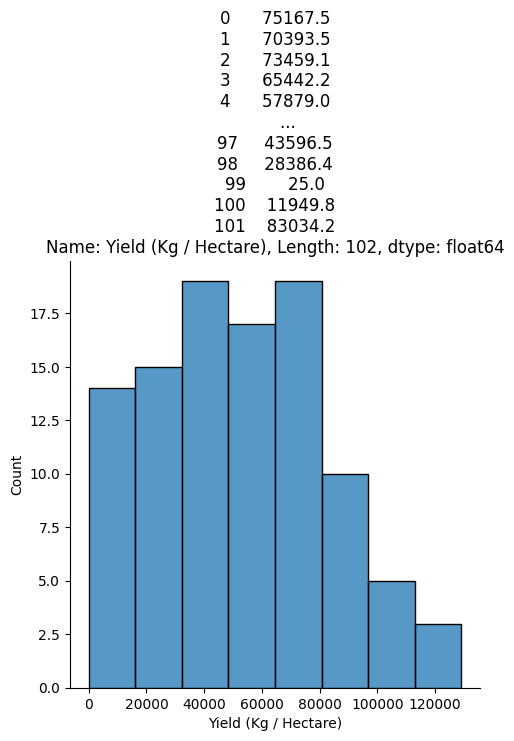

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.displot(df["Production (Tons)"])
plt.title(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.displot(df["Production per Person (Kg)"])
plt.title(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.displot(df["Yield (Kg / Hectare)"])
plt.title(df["Yield (Kg / Hectare)"])
plt.subplot(2,2,4)
sns.displot(df["Yield (Kg / Hectare)"])
plt.title(df["Yield (Kg / Hectare)"])
plt.show()



<Axes: ylabel='Production (Tons)'>

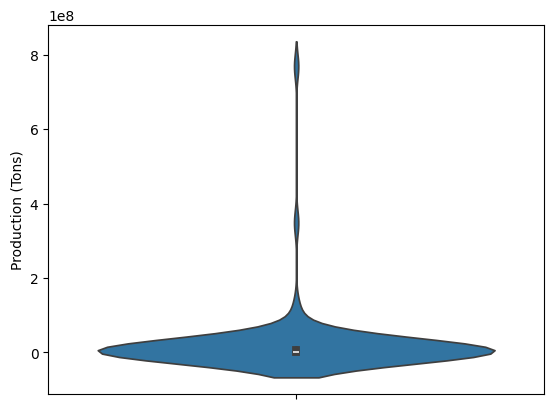

In [73]:
sns.violinplot(df["Production (Tons)"])

## Bivariate Analysis

In [74]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


Which country produces maximum sugarcane?

In [75]:
df_new = df[["Country","Production (Tons)"]].set_index("Country")

In [76]:
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: ylabel='Production (Tons)'>

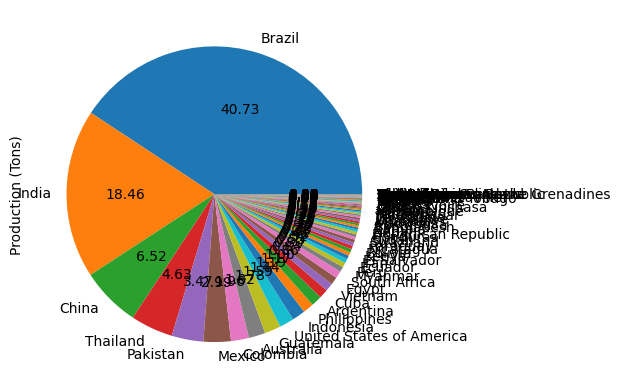

In [77]:
df_new["Production (Tons)"].plot(kind = "pie", autopct = "%.2f")

Brazil, India and China have 65% of production of sugarcane

<Axes: xlabel='Country'>

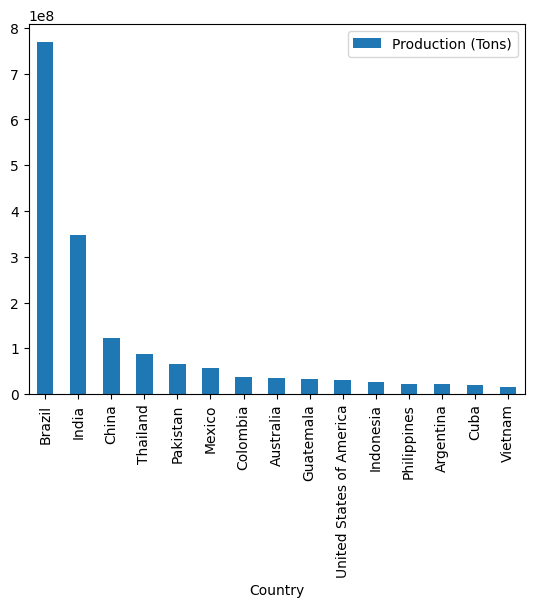

In [78]:
df[["Country","Production (Tons)"]].set_index("Country").sort_values("Production (Tons)", ascending = False).head(15).plot(kind = "bar")


C:\Users\vxgc2\AppData\Local\Temp\ipykernel_15016\1874307166.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America'),
 Text(10, 0, 'Indonesia'),
 Text(11, 0, 'Philippines'),
 Text(12, 0, 'Argentina'),
 Text(13, 0, 'Cuba'),
 Text(14, 0, 'Vietnam')]

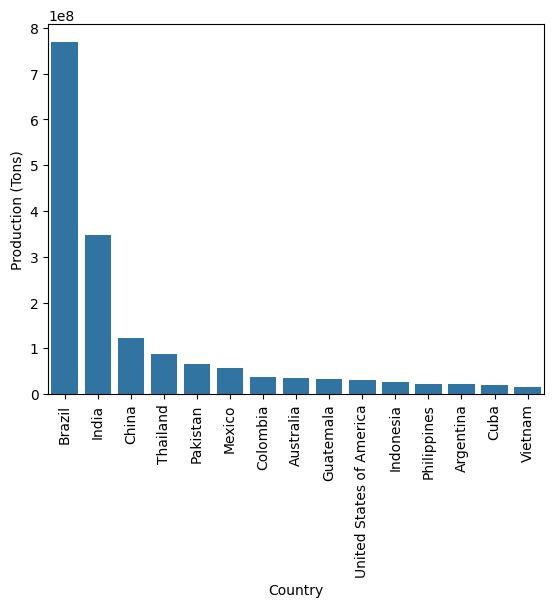

In [79]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


Which country has highest land?

C:\Users\vxgc2\AppData\Local\Temp\ipykernel_15016\2287885366.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

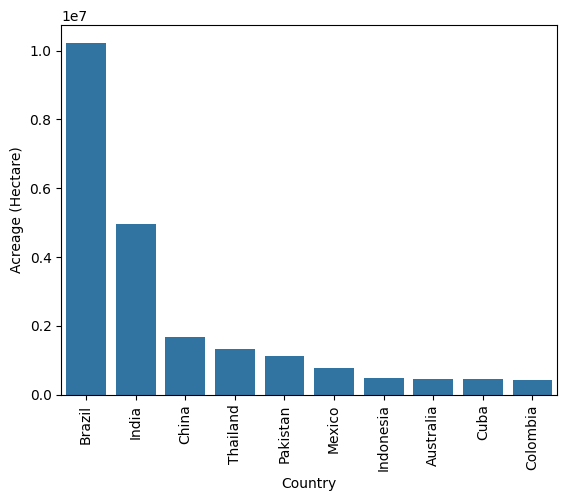

In [80]:
df_acr = df.sort_values("Acreage (Hectare)",ascending=False)
ax = sns.barplot(data = df_acr.head(10),x="Country", y = "Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Which country has highest yield per hectare?

C:\Users\vxgc2\AppData\Local\Temp\ipykernel_15016\4216806181.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

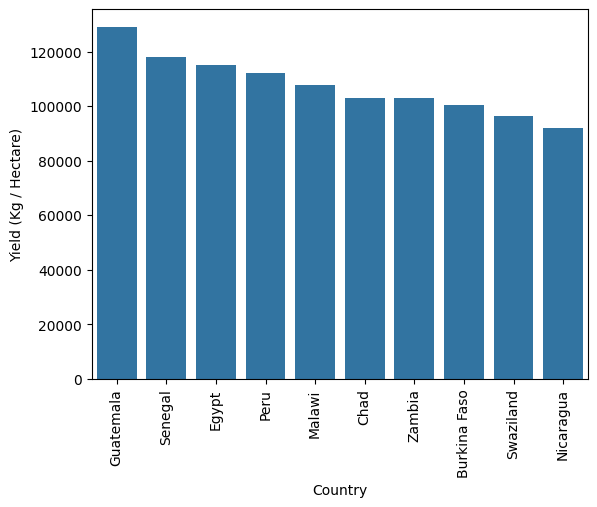

In [81]:
df_yield = df.sort_values("Yield (Kg / Hectare)",ascending=False)
ax = sns.barplot(data = df_yield.head(10),x="Country", y = "Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Which country has highest production?

C:\Users\vxgc2\AppData\Local\Temp\ipykernel_15016\2041071584.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, 'Paraguay'),
 Text(1, 0, 'Colombia'),
 Text(2, 0, 'Trinidad and Tobago'),
 Text(3, 0, 'Panama'),
 Text(4, 0, 'Jamaica'),
 Text(5, 0, 'Ecuador'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Dominican Republic'),
 Text(8, 0, 'Mexico'),
 Text(9, 0, 'Pakistan')]

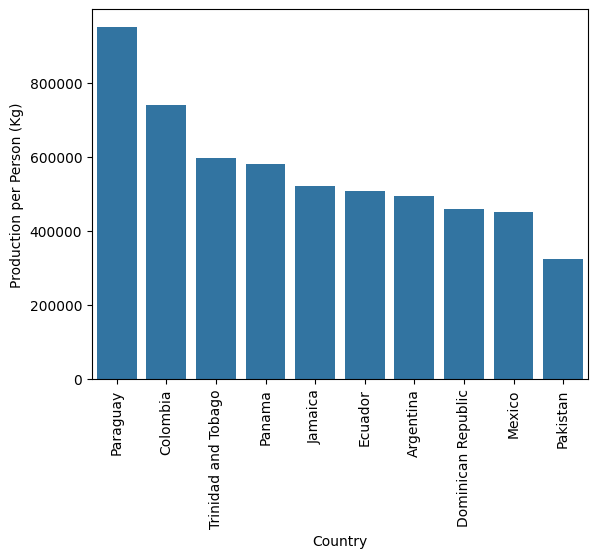

In [82]:
df_pro = df.sort_values("Production per Person (Kg)",ascending=False)
ax = sns.barplot(data = df_pro.head(10),x="Country", y = "Production per Person (Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### Correlation

In [83]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

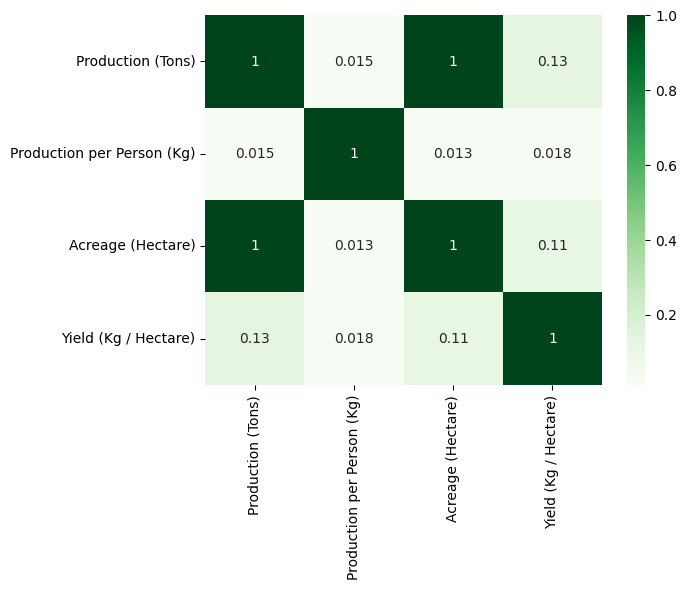

In [84]:
sns.heatmap(numeric_df.corr(), annot = True, cmap="Greens")

Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

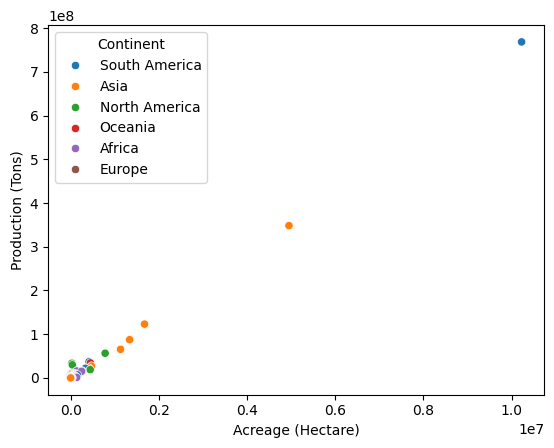

In [85]:
sns.scatterplot(data = df, x = "Acreage (Hectare)", y = "Production (Tons)", hue = "Continent" )

## overall increase in land increases the production


Do countries which yield more sugarcane per hectare produces more sugarcane in total?


<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

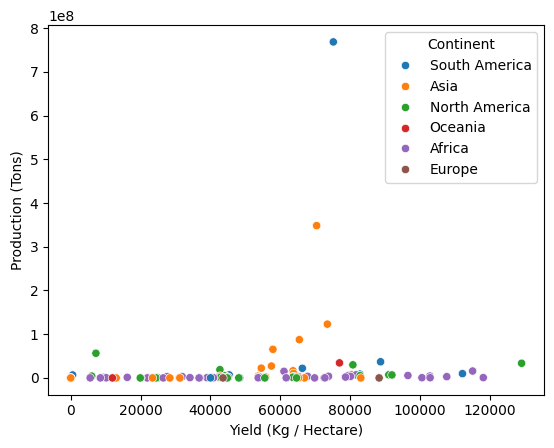

In [86]:
sns.scatterplot(data = df, x = "Yield (Kg / Hectare)" , y = "Production (Tons)", hue = "Continent")

In [87]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Analysis For Continent

In [88]:
df_continent = df.groupby("Continent").sum()

In [89]:
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


### Which Continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

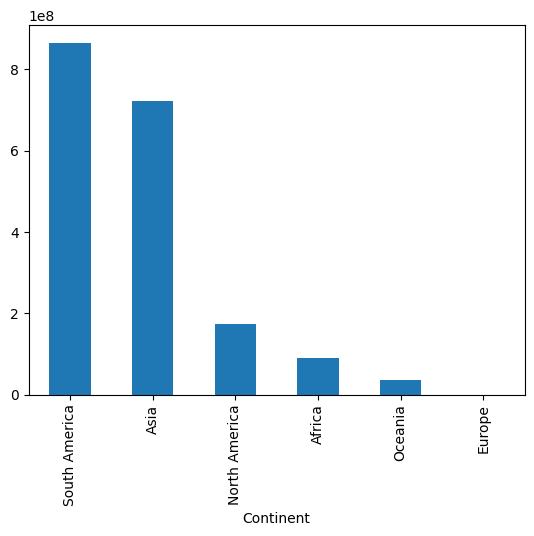

In [90]:
df_continent["Production (Tons)"].sort_values(ascending = False).plot(kind="bar")

### Production distribution by continent

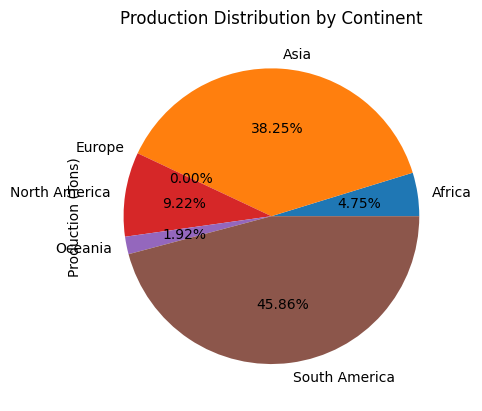

In [106]:
df_continent["Production (Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

### Correlation for Continent


In [107]:
numeric_dfc = df_continent.select_dtypes(include=[np.number])
numeric_dfc.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),number_of_countries
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

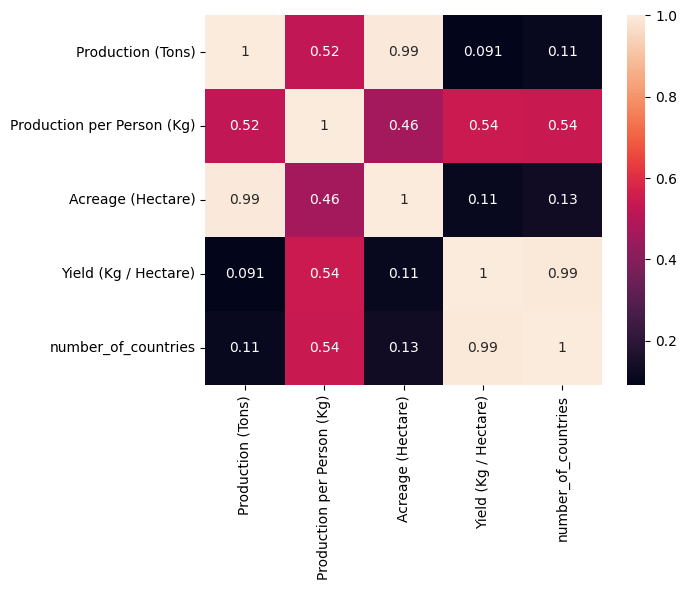

In [108]:
sns.heatmap(numeric_dfc.corr(), annot = True)